### Packages

In [ ]:
import pandas as pd    
import numpy as np     
import matplotlib.pyplot as plt 
import random  
#import string    #string.ascii_letters

### Paramètres

In [ ]:
#Creer de la generecite pour l'ordre de la chaine de markov

max_ord = 256 #acceptance threshold for unicode code
markov_order = 1 #ordre de la chaine de markov (pour l'instant ne marche qu'avec 1, a generaliser)

### Matrice des fréquences

In [ ]:
mat_passage = np.zeros([max_ord]*(markov_order+1), dtype = "int32")
First = np.zeros(max_ord)

### Lecture fichier source

In [ ]:
pokemon = "pokemon_names.txt"
german = "german_words.txt"
test = "text.txt"
mobydick = "mobydick.txt"

choice = pokemon

flatten = lambda l: [item for sublist in l for item in sublist] #function to make a list of lists flatten

def is_ascii(s,lim):
    """Test if the word s contains a character with a unicode code bigger than lim"""
    return all(ord(c) < lim for c in s)

def only_ascii(word,lim):
    """exclude non desired ascii characters from words"""
    return ''.join([l for l in word if ord(l) < lim])

def only_alpha(word):
    """exclude non  alpha ascii characters from words"""
    return ''.join([l for l in word if l.isalpha()])


#Voir plus tard comment gerer les problemes d'encodage de certain textes avec codecs
with open (choice, "r") as myfile:
    words = [only_alpha(w) for line in myfile.read().splitlines() for w in line.split(" ") if len(only_alpha(w))>0]
        
#words = [w for w in words if is_ascii(w,max_ord)]
words

### Remplissage des fréquences

In [ ]:
for w in words :
    for i,l in enumerate(w):
        if i==0: 
            First[ord(l)] += 1
        else:
            mat_passage[ord(w[i-1]),ord(l)] += 1
            
count = mat_passage.sum(axis=1)
st = np.tile(count,len(count)).reshape(-1,len(count)).T
p = mat_passage.astype('float')/st
p[np.isnan(p)]=0

#Pour analyser les occurences de symboles : {chr(i):j for i,j in enumerate(count)}

### Visualisation : Ne marche pas pour le moment !!!

In [ ]:
plt.pcolor(mat_passage, cmap="plasma")
plt.yticks(np.arange(0.5, maxi_size, 1), [chr(c) for c in range(maxi_size)])
plt.xticks(np.arange(0.5, maxi_size, 1), [chr(c) for c in range(maxi_size)])
plt.show()

### Simulation 

In [ ]:
def generate(maxi_len):
    
    new_word = chr(random.choices(range(max_ord),weights=First, k=1)[0])

    for i in range(maxi_len-1):
        new_word += chr(random.choices(range(max_ord),weights=mat_passage[ord(new_word[i])], k=1)[0])
    return new_word.capitalize()

In [ ]:
maxi_size = 10
rep = 5

for m in range(3,maxi_size+1):
    for n in range(rep):
        print(generate(m))

### Amelioration

- A partir de n'importe quel .txt, lire le fichier mot par mot, exclure les mots inutiles (techniques usuelles nlp ?)
- Augmenter l'ordre de la chaine de Markov
- Faire un interface plus interacrive
- Ameliorer visualisation
- generer du texte

## Modification des dictionnaires science etonnante

In [34]:
import re

dic = "FR.txt"
def clean_up(dic):
    '''Return a list with all words in appropriate format'''
    with open ("./data/{}".format(dic), "r") as myfile:
        words =  myfile.read().splitlines()
    reg = '^[a-zA-Z0-9_]+'
    words2 = [re.findall(reg, w) for w in words if re.findall(reg, w)]
    words2 = [w[0] for w in words2 if len(w[0])>1]
    words2 = [w for w in words2 if w.islower()]
    
    return words2

def write_new_dict(words, name):
    '''Takes the ouput of clean_up and write the words in a new file'''
    file = open("./data/{}".format(name),"w") 
    for w in words:
        file.write(w)
        file.write("\n")
    file.close() 
    
    return "Done"
    

In [35]:
import os
for dic in os.listdir("./data"):
    if "New" not in dic:
        if "ES" not in dic:
            if "IT" not in dic:
                print(dic)
                words = clean_up(dic)
                write_new_dict(words, "New" + dic)

EN.txt
FR.txt
SE.txt
HU.txt


In [37]:
len(words)

52776

## HeatMap

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("WordGenerator/Mat.txt", sep=";", header=None)

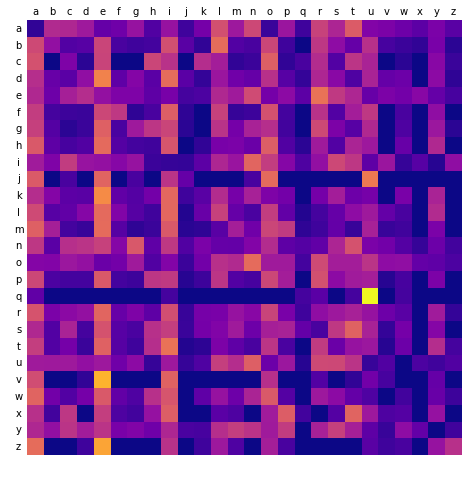

In [39]:
arr = np.array(df)
arr[np.isnan(arr)] = 0
alpha = 0.33
p2Da = arr**alpha

plt.figure(figsize=(8,8))
plt.imshow(p2Da[97:123,97:123],interpolation='nearest', cmap="plasma")
plt.axis('off')

for i in range(97,123):
    plt.text(-1,i-97,chr(i),horizontalalignment='center',    #chr(97) = a, chr(122) = z
                            verticalalignment='center')
    plt.text(i-97,-1,chr(i),horizontalalignment='center',
                            verticalalignment='center')
#plt.savefig(proba_matrix)